##Assignment on Sparks Fund Analysis

* **Created by:** Riya Bansilal Mulani | 2348450
* **Created Date:** 26-05-2024
* **Edited Dates:** 27-05-2024, 28-05-2024

In [ ]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

### Data Insertion

In [ ]:
companies = pd.read_csv("/content/companies.csv", encoding='latin1')
print("Companies data inserted successfully")
rounds= pd.read_csv("/content/rounds2.csv", encoding='latin1')
print("Investment rounds data inserted successfully")
mapping= pd.read_csv("/content/mapping.csv")
print("Mapping data for main sector inserted successfully")

Companies data inserted successfully
Investment rounds data inserted successfully
Mapping data for main sector inserted successfully


### Preprocessing for [Companies] Data

In [ ]:
companies.head(10)

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/Organization/-Fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/Organization/-Qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/Organization/-The-One-Of-Them-Inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
3,/Organization/0-6-Com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
4,/Organization/004-Technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010
5,/Organization/01Games-Technology,01Games Technology,http://www.01games.hk/,Games,operating,HKG,NaN,Hong Kong,Hong Kong,NaN
6,/Organization/0Ndine-Biomedical-Inc,Ondine Biomedical Inc.,http://ondinebio.com,Biotechnology,operating,CAN,BC,Vancouver,Vancouver,01-01-1997
7,/Organization/0Xdata,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011
8,/Organization/1,One Inc.,http://whatis1.com,Mobile,operating,USA,CA,SF Bay Area,San Francisco,01-08-2011
9,/Organization/1-2-3-Listo,"1,2,3 Listo",http://www.123listo.com,E-Commerce,operating,CHL,12,Santiago,Las Condes,01-01-2012


In [ ]:
companies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66368 entries, 0 to 66367
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   permalink      66368 non-null  object
 1   name           66367 non-null  object
 2   homepage_url   61310 non-null  object
 3   category_list  63220 non-null  object
 4   status         66368 non-null  object
 5   country_code   59410 non-null  object
 6   state_code     57821 non-null  object
 7   region         58338 non-null  object
 8   city           58340 non-null  object
 9   founded_at     51147 non-null  object
dtypes: object(10)
memory usage: 5.1+ MB


In [ ]:
companies.isnull().sum()

permalink            0
name                 1
homepage_url      5058
category_list     3148
status               0
country_code      6958
state_code        8547
region            8030
city              8028
founded_at       15221
dtype: int64

In [ ]:
# Handling null values
companies = companies.dropna(subset=['country_code']) #country code is important column for analysis we cannot take risk by synthesising this data
companies.isnull().sum()

permalink            0
name                 1
homepage_url      3652
category_list     1606
status               0
country_code         0
state_code        1589
region            1072
city              1070
founded_at       11968
dtype: int64

In [ ]:
# we are left with 1606 category list that will be used for sector mapping, here we can synthesize it with most frequent value or drop these records to maintain accuracy

companies = companies.dropna(subset=['category_list'])
companies.isnull().sum()

permalink            0
name                 1
homepage_url      3337
category_list        0
status               0
country_code         0
state_code        1536
region            1039
city              1037
founded_at       11276
dtype: int64

In [ ]:
#rest of the columns are not that impactful on our analysis so we can ignore these null values but we are opting to fill them with most frequent values in order to avoid bugs
companies['homepage_url'].fillna(companies['homepage_url'].mode()[0], inplace=True)
companies['state_code'].fillna(companies['state_code'].mode()[0], inplace=True)
companies['region'].fillna(companies['region'].mode()[0], inplace=True)
companies['city'].fillna(companies['city'].mode()[0], inplace=True)
companies['founded_at'].fillna(companies['founded_at'].mode()[0], inplace=True)

companies.isnull().sum() # one record is pur[osely left to fill as name of companies provided are considered to be unique thus will not have mode value

permalink        0
name             1
homepage_url     0
category_list    0
status           0
country_code     0
state_code       0
region           0
city             0
founded_at       0
dtype: int64

### Preprocessing for [Rounds] Data

In [ ]:
rounds.head(10)

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0
5,/ORGANIZATION/004-TECHNOLOGIES,/funding-round/1278dd4e6a37fa4b7d7e06c21b3c1830,venture,NaN,24-07-2014,NaN
6,/organization/01games-technology,/funding-round/7d53696f2b4f607a2f2a8cbb83d01839,undisclosed,NaN,01-07-2014,41250.0
7,/ORGANIZATION/0NDINE-BIOMEDICAL-INC,/funding-round/2b9d3ac293d5cdccbecff5c8cb0f327d,seed,NaN,11-09-2009,43360.0
8,/organization/0ndine-biomedical-inc,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,NaN,21-12-2009,719491.0
9,/ORGANIZATION/0XDATA,/funding-round/383a9bd2c04f7038bb543ccef5ba3eae,seed,NaN,22-05-2013,3000000.0


In [ ]:
rounds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114949 entries, 0 to 114948
Data columns (total 6 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   company_permalink        114949 non-null  object 
 1   funding_round_permalink  114949 non-null  object 
 2   funding_round_type       114949 non-null  object 
 3   funding_round_code       31140 non-null   object 
 4   funded_at                114949 non-null  object 
 5   raised_amount_usd        94959 non-null   float64
dtypes: float64(1), object(5)
memory usage: 5.3+ MB


In [ ]:
rounds.isnull().sum()

company_permalink              0
funding_round_permalink        0
funding_round_type             0
funding_round_code         83809
funded_at                      0
raised_amount_usd          19990
dtype: int64

In [ ]:
#Handling null vlaues
#raised_amount_usd is highly important column for analysis, based on it's data type we can fill it with agregate mean thats average value but this would be maniplation with raw data that can hamper our accurracy of 19990 records that's arround 17% of our data
rounds[rounds['raised_amount_usd'].isnull()]

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
1,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
5,/ORGANIZATION/004-TECHNOLOGIES,/funding-round/1278dd4e6a37fa4b7d7e06c21b3c1830,venture,NaN,24-07-2014,NaN
14,/organization/1,/funding-round/5de6d8828aef7d925d97918d15727670,undisclosed,NaN,05-02-2013,NaN
17,/ORGANIZATION/1-4-ALL,/funding-round/e97a192e13ea0ee3c4f71136b4f3ec16,equity_crowdfunding,NaN,21-04-2013,NaN
18,/organization/1-618-technology,/funding-round/83b8f4c7d37ecef5e001a5e953bf461a,equity_crowdfunding,NaN,22-01-2014,NaN
...,...,...,...,...,...,...
114899,/ORGANIZATION/ZYMR-INC-,/funding-round/9048d1a80edeae803ed1790c9f473eec,angel,NaN,12-12-2012,NaN
114905,/ORGANIZATION/ZYNERGY-PROJECTS-SERVICES,/funding-round/3d7dbd2d92220d93e2b5455f914a0918,venture,NaN,19-08-2015,NaN
114913,/ORGANIZATION/ZYNGA,/funding-round/d27f10a20b15b4ef3d9961d54eabf6b1,angel,NaN,01-01-2007,NaN
114927,/ORGANIZATION/ZYPSEE,/funding-round/c67e22c5448435adaf5a2d101e449dde,seed,NaN,26-07-2013,NaN


In [ ]:
# there is no particular pattern observed to justify null values in 'raised_amount_usd' column so we make a decision to drop these random records.

rounds = rounds.dropna(subset=['raised_amount_usd'])
rounds.isnull().sum()

company_permalink              0
funding_round_permalink        0
funding_round_type             0
funding_round_code         66790
funded_at                      0
raised_amount_usd              0
dtype: int64

In [ ]:
# 'funding_round_code' could probably be one of the important column to conclude for investment type analysis,
# it suggests number of rounds of investments have been done, thus if it's left null we can consider it as first round of investmnt thus filling it with 'A'

rounds['funding_round_code'].fillna('A', inplace=True)
rounds.isnull().sum()

company_permalink          0
funding_round_permalink    0
funding_round_type         0
funding_round_code         0
funded_at                  0
raised_amount_usd          0
dtype: int64

In [ ]:
rounds.info()

<class 'pandas.core.frame.DataFrame'>
Index: 94959 entries, 0 to 114948
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   company_permalink        94959 non-null  object 
 1   funding_round_permalink  94959 non-null  object 
 2   funding_round_type       94959 non-null  object 
 3   funding_round_code       94959 non-null  object 
 4   funded_at                94959 non-null  object 
 5   raised_amount_usd        94959 non-null  float64
dtypes: float64(1), object(5)
memory usage: 5.1+ MB


### Preprocessing for [Mapping] Data

In [ ]:
mapping.head(10)

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,NaN,0,1,0,0,0,0,0,0,0
1,3D,0,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,0,1,0,0,0
4,Accounting,0,0,0,0,0,0,0,0,1
5,Active Lifestyle,0,0,0,0,1,0,0,0,0
6,Ad Targeting,0,0,0,0,0,0,0,0,1
7,Advanced Materials,0,0,0,0,0,1,0,0,0
8,Adventure Travel,1,0,0,0,0,0,0,0,0
9,Advertising,0,0,0,0,0,0,0,0,1


In [ ]:
mapping.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 688 entries, 0 to 687
Data columns (total 10 columns):
 #   Column                                   Non-Null Count  Dtype 
---  ------                                   --------------  ----- 
 0   category_list                            687 non-null    object
 1   Automotive & Sports                      688 non-null    int64 
 2   Blanks                                   688 non-null    int64 
 3   Cleantech / Semiconductors               688 non-null    int64 
 4   Entertainment                            688 non-null    int64 
 5   Health                                   688 non-null    int64 
 6   Manufacturing                            688 non-null    int64 
 7   News, Search and Messaging               688 non-null    int64 
 8   Others                                   688 non-null    int64 
 9   Social, Finance, Analytics, Advertising  688 non-null    int64 
dtypes: int64(9), object(1)
memory usage: 53.9+ KB


###### We don't need to observe null values here logically as this is a mapping data because any category can be mapped to only one sector at a time


### Normalizing the Data

In [ ]:
# Normalize the permalink fields in both companies and rounds data to the lower case
companies['permalink'] = companies['permalink'].str.lower().str.strip()
rounds['company_permalink'] = rounds['company_permalink'].str.lower().str.strip()

### Mergeing the Datasets

In [ ]:
# Merge the companies and rounds data on permalink
rounds_merged_data = pd.merge(rounds, companies, left_on='company_permalink', right_on='permalink', how='inner')

In [ ]:
rounds_merged_data.head(10)

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,01-01-2012
1,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,A,01-03-2014,700000.0,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
3,/organization/01games-technology,/funding-round/7d53696f2b4f607a2f2a8cbb83d01839,undisclosed,A,01-07-2014,41250.0,/organization/01games-technology,01Games Technology,http://www.01games.hk/,Games,operating,HKG,CA,Hong Kong,Hong Kong,01-01-2012
4,/organization/0ndine-biomedical-inc,/funding-round/2b9d3ac293d5cdccbecff5c8cb0f327d,seed,A,11-09-2009,43360.0,/organization/0ndine-biomedical-inc,Ondine Biomedical Inc.,http://ondinebio.com,Biotechnology,operating,CAN,BC,Vancouver,Vancouver,01-01-1997
5,/organization/0ndine-biomedical-inc,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,A,21-12-2009,719491.0,/organization/0ndine-biomedical-inc,Ondine Biomedical Inc.,http://ondinebio.com,Biotechnology,operating,CAN,BC,Vancouver,Vancouver,01-01-1997
6,/organization/0xdata,/funding-round/383a9bd2c04f7038bb543ccef5ba3eae,seed,A,22-05-2013,3000000.0,/organization/0xdata,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011
7,/organization/0xdata,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,B,09-11-2015,20000000.0,/organization/0xdata,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011
8,/organization/0xdata,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,A,03-01-2013,1700000.0,/organization/0xdata,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011
9,/organization/0xdata,/funding-round/e1cfcbe1bdf4c70277c5f29a3482f24e,venture,A,19-07-2014,8900000.0,/organization/0xdata,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011


In [ ]:
rounds_merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88529 entries, 0 to 88528
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   company_permalink        88529 non-null  object 
 1   funding_round_permalink  88529 non-null  object 
 2   funding_round_type       88529 non-null  object 
 3   funding_round_code       88529 non-null  object 
 4   funded_at                88529 non-null  object 
 5   raised_amount_usd        88529 non-null  float64
 6   permalink                88529 non-null  object 
 7   name                     88528 non-null  object 
 8   homepage_url             88529 non-null  object 
 9   category_list            88529 non-null  object 
 10  status                   88529 non-null  object 
 11  country_code             88529 non-null  object 
 12  state_code               88529 non-null  object 
 13  region                   88529 non-null  object 
 14  city                  

##### Now merged dataset is ready for visualization but, we have two contraints

*   English speaking countries
*   Between 5 to 15 million USD per round of investment



In [ ]:
# Observing available contries in data
rounds_merged_data['country_code'].unique()

array(['IND', 'USA', 'CHN', 'HKG', 'CAN', 'CHL', 'GBR', 'FRA', 'AUS',
       'ROM', 'KOR', 'NLD', 'SWE', 'RUS', 'DNK', 'NOR', 'COL', 'ESP',
       'BEL', 'IRL', 'ITA', 'ISR', 'SGP', 'NZL', 'CHE', 'BRA', 'SVN',
       'JOR', 'HUN', 'JPN', 'BWA', 'DEU', 'NGA', 'FIN', 'CYP', 'CRI',
       'IDN', 'PRT', 'ARG', 'TWN', 'THA', 'SVK', 'UKR', 'LTU', 'ISL',
       'MEX', 'TUR', 'VEN', 'URY', 'AUT', 'KEN', 'ZAF', 'PHL', 'MNE',
       'MYS', 'PER', 'POL', 'EGY', 'PAN', 'LVA', 'GGY', 'VNM', 'UGA',
       'HRV', 'EST', 'BGR', 'MUS', 'LBN', 'GRC', 'NPL', 'LUX', 'CZE',
       'ARE', 'SAU', 'PAK', 'IRN', 'ALB', 'BAH', 'ARM', 'BGD', 'MDA',
       'GHA', 'TUN', 'ZWE', 'BRB', 'NIC', 'TAN', 'TTO', 'CMR', 'SRB',
       'PRI', 'BLR', 'CYM', 'ECU', 'SLV', 'MLT', 'GTM', 'ZMB', 'GIB',
       'BHR', 'TGO', 'BMU', 'HND', 'MCO', 'MMR', 'KAZ', 'QAT', 'MAR',
       'LIE', 'GEO', 'DOM', 'DZA', 'JAM', 'KNA', 'AZE', 'SEN', 'RWA',
       'DMA', 'UZB', 'BLZ', 'OMN', 'PSE', 'KWT', 'KHM', 'CIV', 'BLM',
       'GRD', 'LAO',

In [ ]:
# Actual english speaking countries
english_speaking_country_codes = [
   "BWA",  # Botswana
    "CMR",  # Cameroon
    "SWZ",  # Eswatini
    "GHA",  # Ghana
    "KEN",  # Kenya
    "LSO",  # Lesotho
    "LBR",  # Liberia
    "MWI",  # Malawi
    "MUS",  # Mauritius
    "NAM",  # Namibia
    "NGA",  # Nigeria
    "RWA",  # Rwanda
    "SYC",  # Seychelles
    "SLE",  # Sierra Leone
    "ZAF",  # South Africa
    "SSD",  # South Sudan
    "SDN",  # Sudan
    "TZA",  # Tanzania
    "GMB",  # The Gambia
    "UGA",  # Uganda
    "ZMB",  # Zambia
    "ZWE",  # Zimbabwe
    "ATG",  # Antigua and Barbuda
    "BHS",  # The Bahamas
    "BRB",  # Barbados
    "BLZ",  # Belize
    "CAN",  # Canada
    "DMA",  # Dominica
    "GRD",  # Grenada
    "GUY",  # Guyana
    "JAM",  # Jamaica
    "KNA",  # Saint Kitts and Nevis
    "LCA",  # Saint Lucia
    "VCT",  # Saint Vincent and the Grenadines
    "TTO",  # Trinidad and Tobago
    "USA",  # United States
    "IND",  # India
    "PAK",  # Pakistan
    "PHL",  # Philippines
    "SGP",  # Singapore
    "LKA",  # Sri Lanka
    "IRL",  # Ireland
    "MLT",  # Malta
    "GBR",  # United Kingdom
    "AUS",  # Australia
    "FJI",  # Fiji
    "KIR",  # Kiribati
    "MHL",  # Marshall Islands
    "FSM",  # Micronesia
    "NRU",  # Nauru
    "NZL",  # New Zealand
    "PLW",  # Palau
    "PNG",  # Papua New Guinea
    "WSM",  # Samoa
    "SLB",  # Solomon Islands
    "TON",  # Tonga
    "TUV",  # Tuvalu
    "VUT"   # Vanuatu
]

#filtering data based on official language
filtered_merged_data = rounds_merged_data[rounds_merged_data['country_code'].isin(english_speaking_country_codes)]

print(f"Number of filtered companies: {len(filtered_merged_data)}")

Number of filtered companies: 73106


In [ ]:
filtered_merged_data.describe()

,raised_amount_usd
count,7.310600e+04
mean,1.038937e+07
std,1.157163e+08
min,0.000000e+00
25%,4.514615e+05
50%,2.000000e+06
75%,7.709549e+06
max,2.127194e+10


##### We can observe that raised investments in past are too much deviated from our range of [5 to 15 millian]

In [ ]:
fund_type = filtered_merged_data.loc[:,['funding_round_type', 'funding_round_code', 'raised_amount_usd']]

fund_type = fund_type[
    (fund_type['raised_amount_usd'] >= 5e6) & (fund_type['raised_amount_usd'] <= 15e6)
]

print("\nAverage investment amount for each type (filtered between 5 to 15 million USD):")
fund_type


Average investment amount for each type (filtered between 5 to 15 million USD):


,funding_round_type,funding_round_code,raised_amount_usd
0,venture,B,10000000.0
9,venture,A,8900000.0
14,private_equity,A,6000000.0
15,venture,A,5000000.0
71,venture,A,11999347.0
...,...,...,...
88499,venture,B,8400000.0
88503,venture,B,12000000.0
88504,grant,A,7500000.0
88505,venture,A,14219999.0


In [ ]:
fund_type.describe()

,raised_amount_usd
count,1.558300e+04
mean,8.837933e+06
std,3.066985e+06
min,5.000000e+06
25%,6.000000e+06
50%,8.100000e+06
75%,1.100000e+07
max,1.500000e+07


we can justify that in past 15,583 investments had happen between 5 to 15 millians

In [ ]:
# Group by funding_round_type and funding_round_code, summing up raised_amount_usd
fund_type_df = fund_type.groupby(['funding_round_type', 'funding_round_code']).sum().unstack()

fund_type_df

raised_amount_usd                              \
funding_round_code                    A             B             C   
funding_round_type                                                    
angel                      3.344401e+08           NaN           NaN   
convertible_note           3.381908e+08           NaN           NaN   
debt_financing             6.650917e+09  1.800000e+07           NaN   
equity_crowdfunding        1.261886e+08           NaN           NaN   
grant                      1.242316e+09           NaN           NaN   
non_equity_assistance      1.500000e+07           NaN           NaN   
post_ipo_debt              2.869750e+08           NaN           NaN   
post_ipo_equity            1.171922e+09  5.832264e+06           NaN   
private_equity             3.306992e+09           NaN           NaN   
product_crowdfunding       1.022396e+08           NaN           NaN   
secondary_market           1.991126e+07           NaN           NaN   
seed                       1.063562e+09  5.200000e+06           NaN   
undisclosed                1.294515e+09  5.000000e+06           NaN   
venture                    6.587478e+10  3.133782e+10  1.561570e+10   

                                                                             \
funding_round_code                D             E            F            G   
funding_round_type                                                            
angel                           NaN           NaN          NaN          NaN   
convertible_note                NaN           NaN          NaN          NaN   
debt_financing         5.000000e+06           NaN          NaN          NaN   
equity_crowdfunding             NaN           NaN          NaN          NaN   
grant                           NaN           NaN          NaN          NaN   
non_equity_assistance           NaN           NaN          NaN          NaN   
post_ipo_debt                   NaN           NaN          NaN          NaN   
post_ipo_equity                 NaN           NaN          NaN          NaN   
private_equity                  NaN           NaN          NaN          NaN   
product_crowdfunding            NaN           NaN          NaN          NaN   
secondary_market                NaN           NaN          NaN          NaN   
seed                            NaN           NaN          NaN          NaN   
undisclosed                     NaN           NaN          NaN          NaN   
venture                5.983739e+09  2.117817e+09  672207002.0  112750113.0   

                                   
funding_round_code              H  
funding_round_type                 
angel                         NaN  
convertible_note              NaN  
debt_financing                NaN  
equity_crowdfunding           NaN  
grant                         NaN  
non_equity_assistance         NaN  
post_ipo_debt                 NaN  
post_ipo_equity               NaN  
private_equity                NaN  
product_crowdfunding          NaN  
secondary_market              NaN  
seed                          NaN  
undisclosed                   NaN  
venture                14500000.0

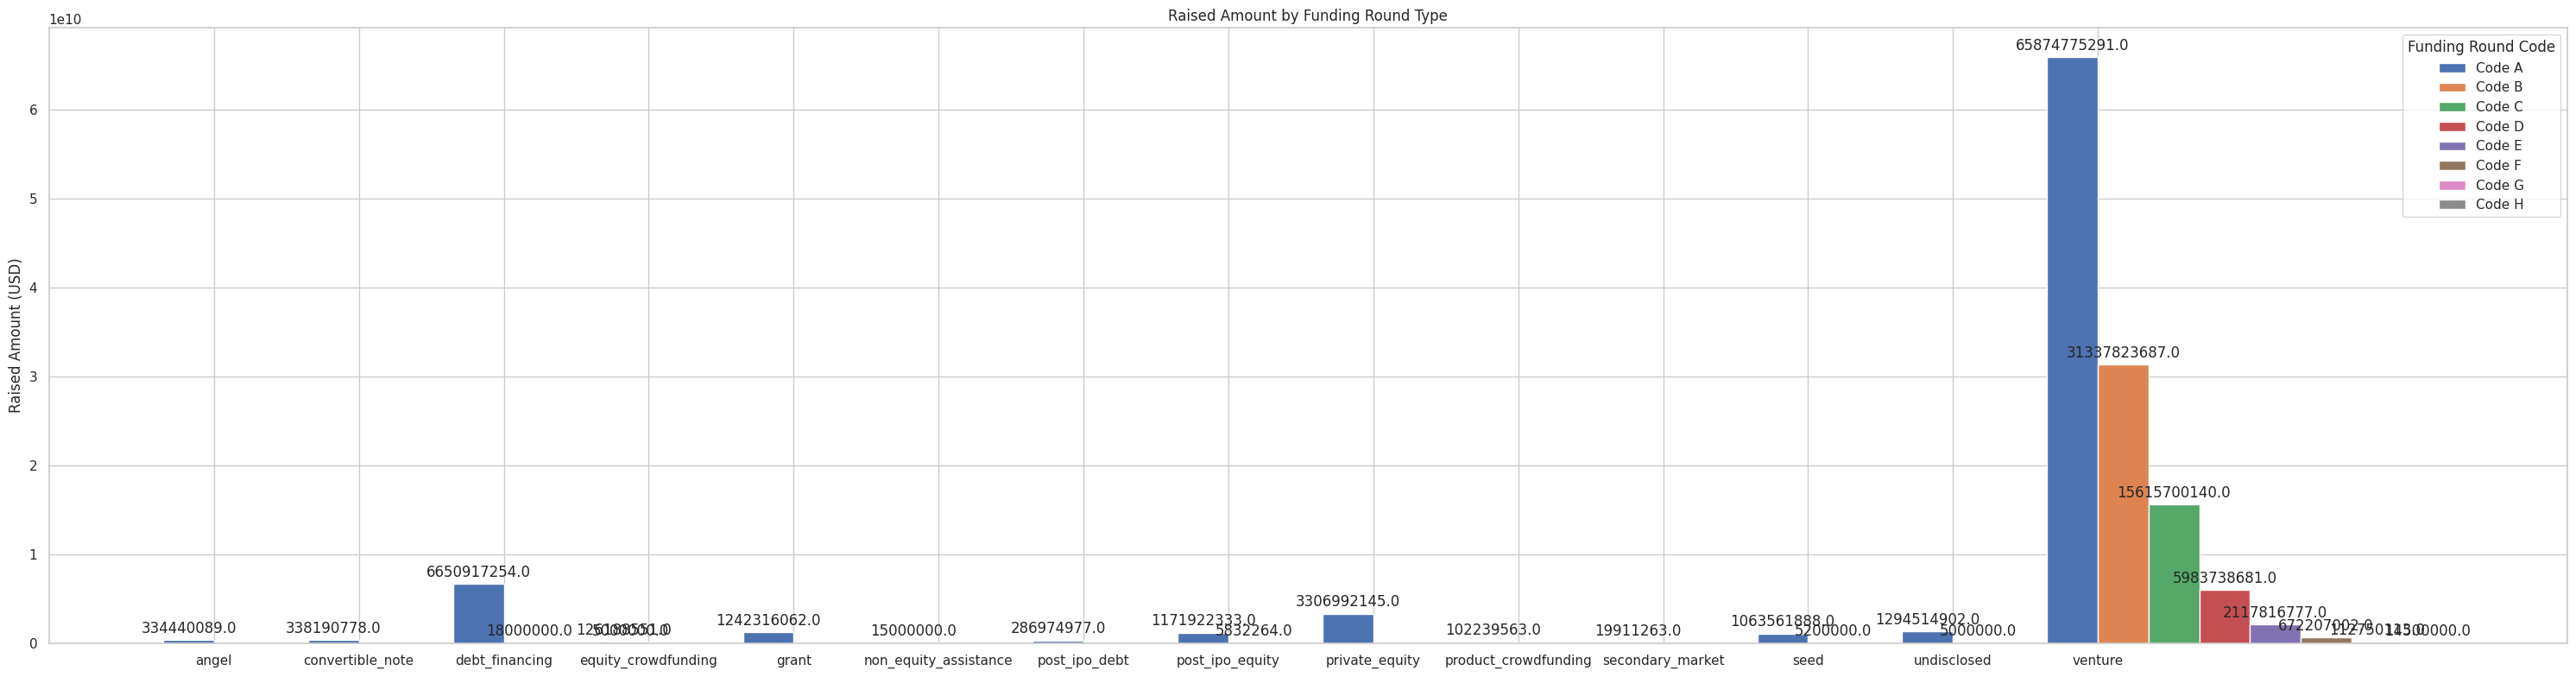

In [ ]:

# Plot the grouped barplot
fig, ax = plt.subplots(figsize=(30, 8))

# Set the positions of the bars for each group
x = np.arange(len(fund_type_df.index))
width = 0.35  # Width of each bar

# Check if the dataframe has a MultiIndex
if isinstance(fund_type_df.columns, pd.MultiIndex):
    # Plot the bars for each funding_round_type
    bars = []
    for i, code in enumerate(fund_type_df.columns.levels[1]):
        bars.append(ax.bar(x + i * width, fund_type_df['raised_amount_usd'][code], width, label=f'Code {code}'))
else:
    raise ValueError("The DataFrame does not have a MultiIndex structure.")

# Add labels and title
ax.set_ylabel('Raised Amount (USD)')
ax.set_title('Raised Amount by Funding Round Type')
ax.set_xticks(x + width / 2)
ax.set_xticklabels(fund_type_df.index)
ax.legend(title='Funding Round Code')

# Add value labels on top of the bars
def add_value_labels(bars):
    for bar in bars:
        for rect in bar:
            height = rect.get_height()
            ax.annotate('{}'.format(height),
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 3),
                        textcoords="offset points",
                        ha='center', va='bottom')

add_value_labels(bars)

# Show the plot
plt.tight_layout()
plt.show()



*   Here we can observe that ***venture type*** of investment has been highly used within the required price range of 5 to 15 millions
*   first four rounds of investment were made with decent amount ***code A, B, C and D***
*   Next two rounds ***code E and F*** are made with significantly low amount that is barely close to 5 millions

* We suggest that Venture type of investment ***should not*** go more than F round as it would be below 5 millions that could lead to lower turnovers

*  ***Debt financing and Private Equity*** could also be considered as optional types of investment given lesser priority than Venture.




In [ ]:
# Aggregate total investment by country
print("\nAnalyzing investments by country...")
country_analysis = filtered_merged_data.groupby('country_code')['raised_amount_usd'].sum().reset_index()
country_analysis = country_analysis.sort_values(by='raised_amount_usd', ascending=False)
print("\nTotal investment amount by country (sorted):")
country_analysis


Analyzing investments by country...

Total investment amount by country (sorted):


,country_code,raised_amount_usd
27,USA,6.657821e+11
7,GBR,3.243681e+10
10,IND,2.738383e+10
4,CAN,1.830412e+10
23,SGP,4.047940e+09
0,AUS,3.833703e+09
11,IRL,2.394765e+09
19,NZL,1.642834e+09
28,ZAF,1.074068e+09
9,GRD,7.500000e+08




*   Simply if we observe US, Great Bretain and India are top 3 english speaking countries where in investments were made in past by the companies
*   But as we have already observed type of investment let's align our country analysis to the same



## Country Analysis for [Venture] type of investment

In [ ]:
# Filter the data to include only 'venture' funding round type
countrywise_venture_df = filtered_merged_data[filtered_merged_data['funding_round_type'] == 'venture']

# Group by 'country_code' and sum the 'raised_amount_usd'
countrywise_venture_df = countrywise_venture_df.groupby('country_code')['raised_amount_usd'].sum().reset_index()

# Sort the DataFrame by 'raised_amount_usd' in descending order and select the top 11 values
top_venture_df = countrywise_venture_df.sort_values(by='raised_amount_usd', ascending=False).head(11)


# Display the DataFrame
print(top_venture_df)

   country_code  raised_amount_usd
19          USA       4.200680e+11
4           GBR       2.007281e+10
6           IND       1.426151e+10
2           CAN       9.482218e+09
16          SGP       2.793918e+09
7           IRL       1.669286e+09
0           AUS       1.319029e+09
13          NZL       4.483164e+08
20          ZAF       2.337131e+08
12          NGA       1.834400e+08
15          PHL       1.144997e+08


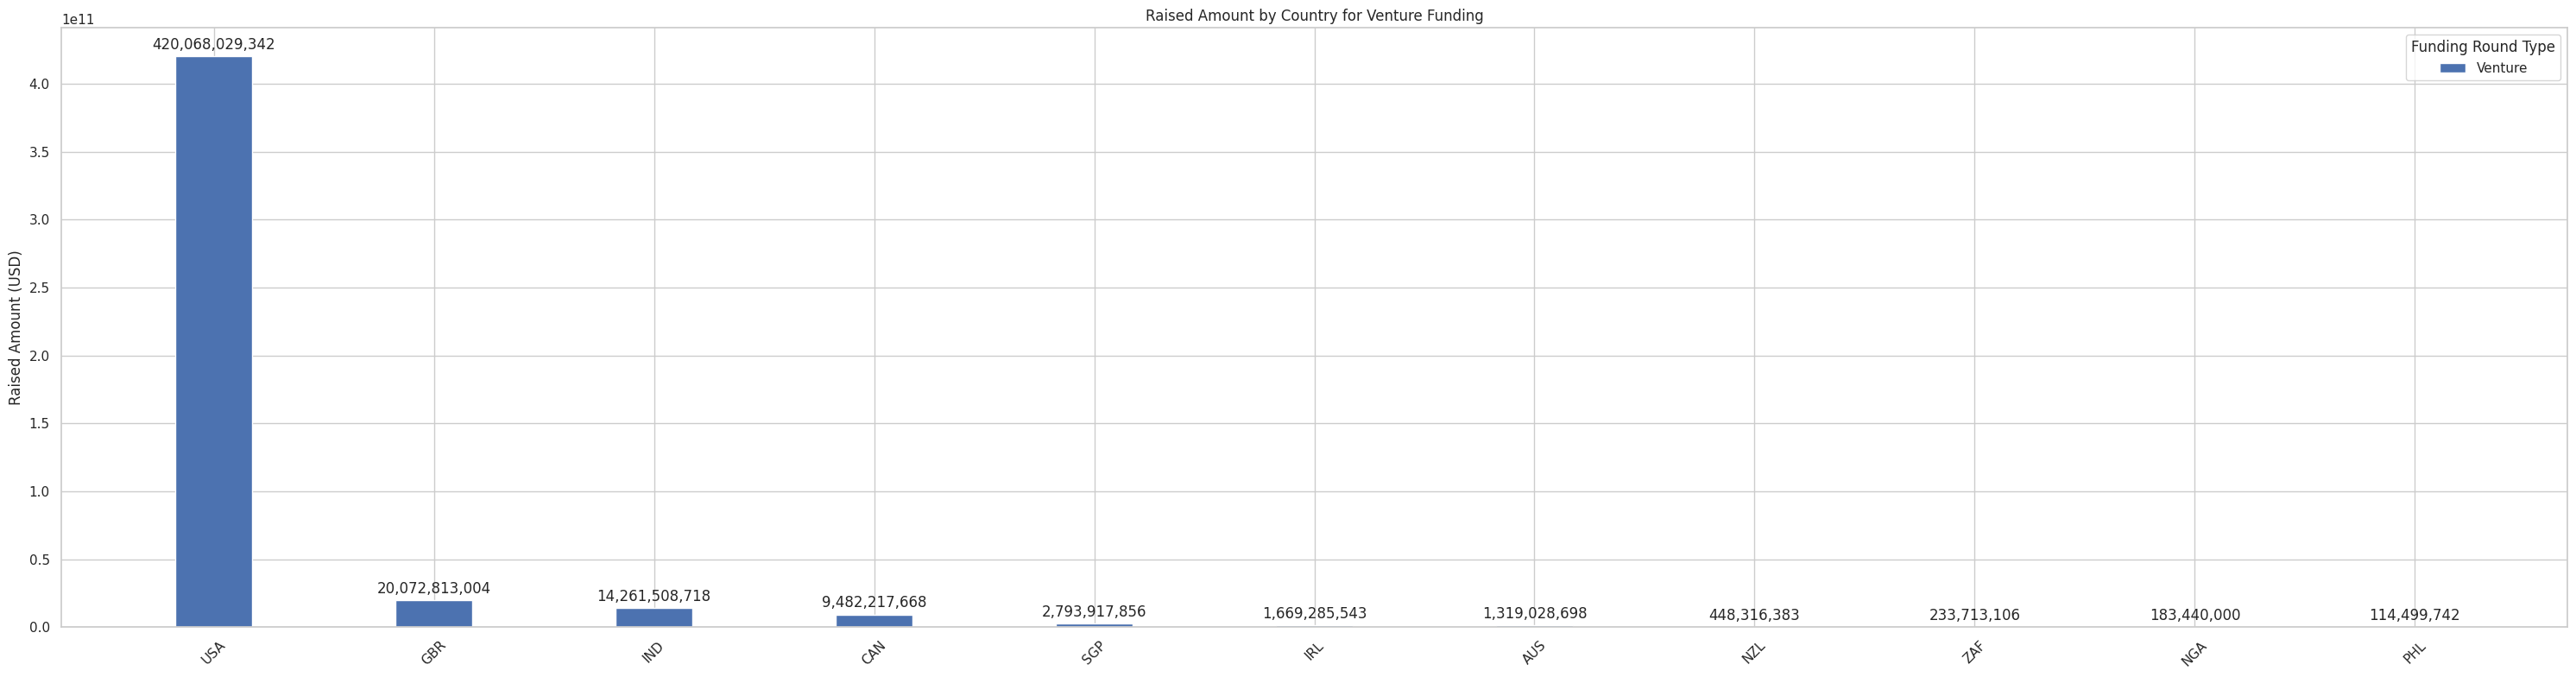

In [ ]:
# Plot the data
fig, ax = plt.subplots(figsize=(30, 8))

# Set the positions of the bars
x = np.arange(len(top_venture_df['country_code']))
width = 0.35  # Width of each bar

# Plot the bar chart
bars = ax.bar(x, top_venture_df['raised_amount_usd'], width, label='Venture')

# Add labels and title
ax.set_ylabel('Raised Amount (USD)')
ax.set_title('Raised Amount by Country for Venture Funding')
ax.set_xticks(x)
ax.set_xticklabels(top_venture_df['country_code'], rotation=45)
ax.legend(title='Funding Round Type')

# Add value labels on top of the bars
def add_value_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate('{:,.0f}'.format(height),
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

add_value_labels(bars)

# Show the plot
plt.tight_layout()
plt.show()



*   We can observe that USA has been extremly favriate country of investors specifically when it comes to Venture type of investment
*   Great Britain and India are able to secure second and third position when it comes to investors choice but are significantly lower compared to USA.



## Country Analysis for [Debt Finance] type of investment



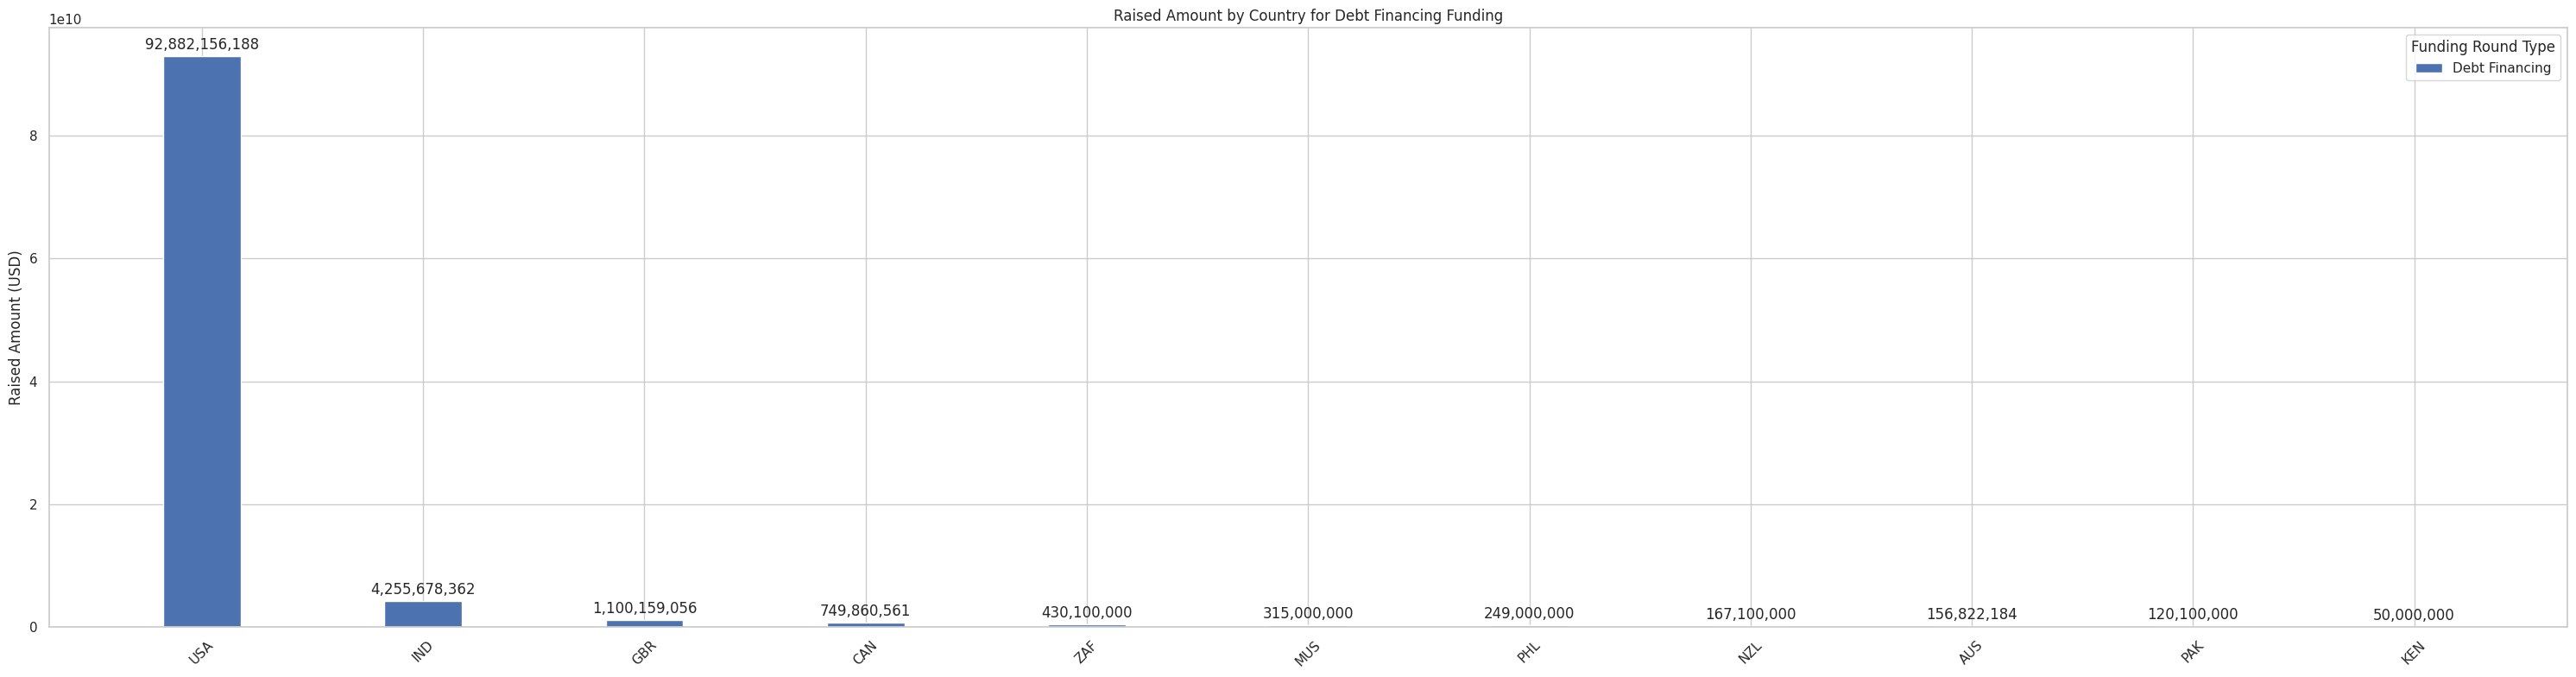

In [ ]:
# Filter the data to include only 'debt_financing' funding round type
countrywise_debtFinancing_df = filtered_merged_data[filtered_merged_data['funding_round_type'] == 'debt_financing']

# Group by 'country_code' and sum the 'raised_amount_usd'
countrywise_debtFinancing_df = countrywise_debtFinancing_df.groupby('country_code')['raised_amount_usd'].sum().reset_index()

# Sort the DataFrame by 'raised_amount_usd' in descending order and select the top 11 values
top_debtFinancing_df = countrywise_debtFinancing_df.sort_values(by='raised_amount_usd', ascending=False).head(11)

# Plot the data
fig, ax = plt.subplots(figsize=(30, 8))

# Set the positions of the bars
x = np.arange(len(top_debtFinancing_df['country_code']))
width = 0.35  # Width of each bar

# Plot the bar chart
bars = ax.bar(x, top_debtFinancing_df['raised_amount_usd'], width, label='Debt Financing')

# Add labels and title
ax.set_ylabel('Raised Amount (USD)')
ax.set_title('Raised Amount by Country for Debt Financing Funding')
ax.set_xticks(x)
ax.set_xticklabels(top_debtFinancing_df['country_code'], rotation=45)
ax.legend(title='Funding Round Type')

# Add value labels on top of the bars
def add_value_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate('{:,.0f}'.format(height),
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

add_value_labels(bars)

# Show the plot
plt.tight_layout()
plt.show()



*   The only change we can observe is that India and Great Britain have swaped there positions, that explains US is still leading unbeatably.


## Country Analysis for [Privat Equity] type of investment


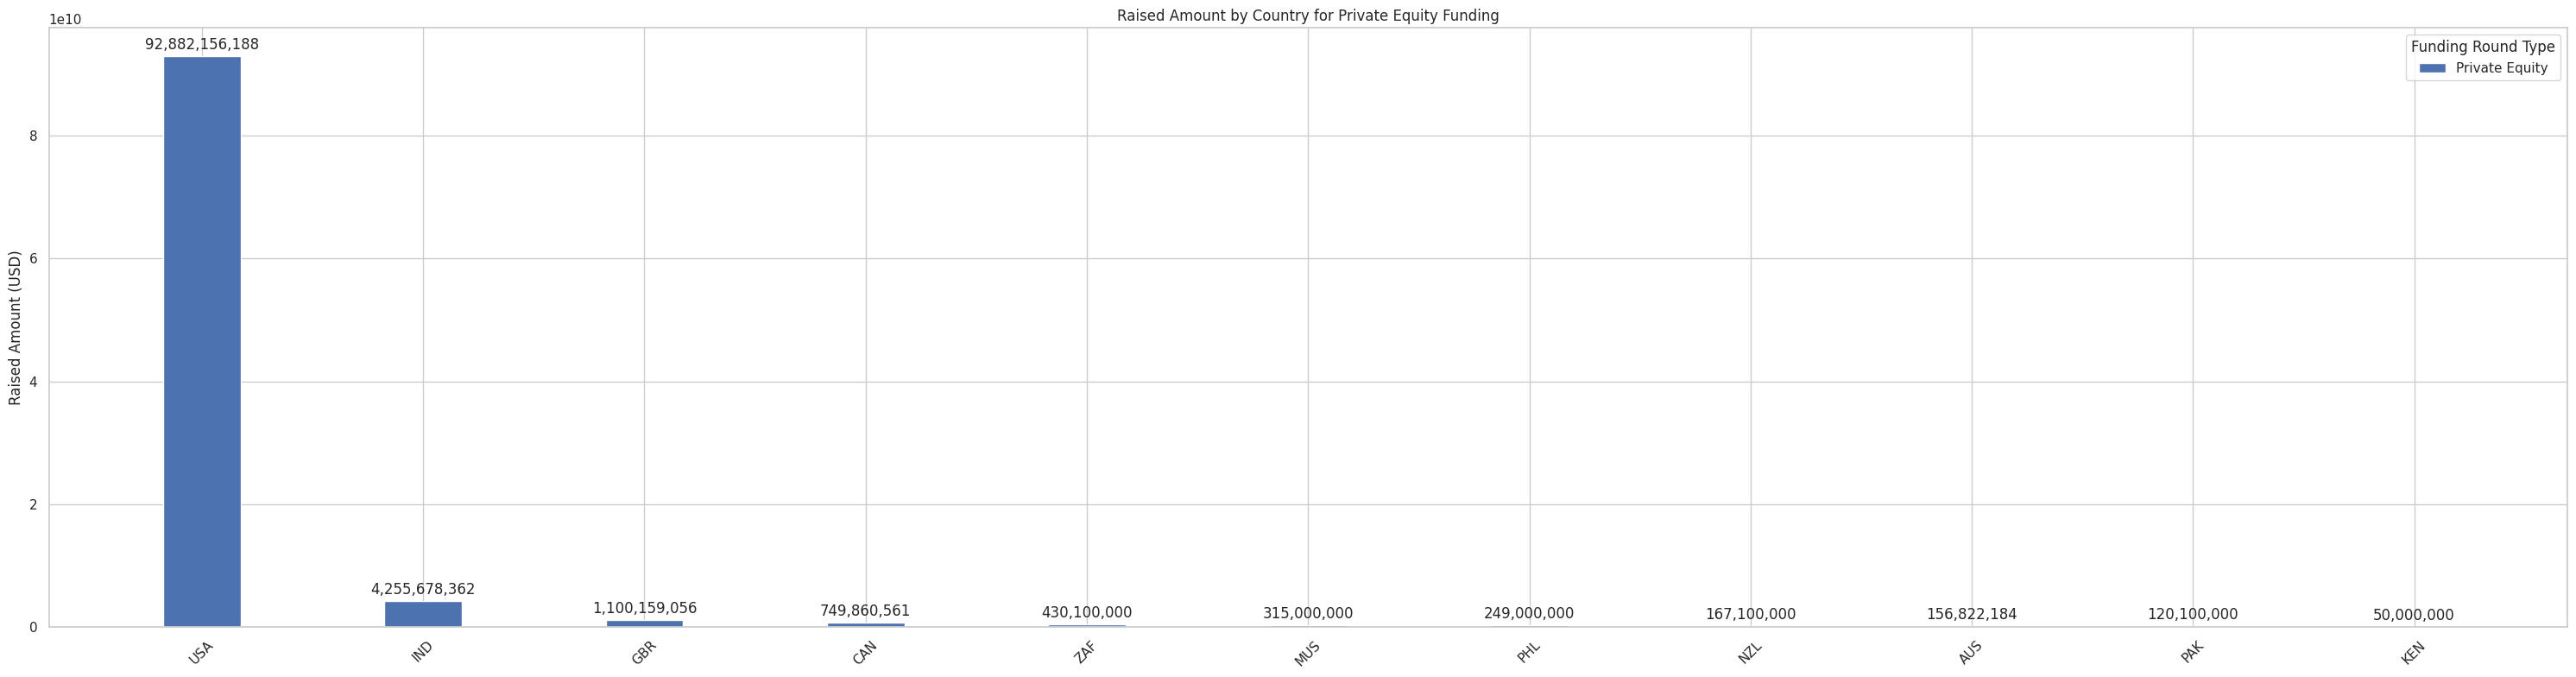

In [ ]:
# Filter the data to include only 'private_equity' funding round type
countrywise_private_equity_df = filtered_merged_data[filtered_merged_data['funding_round_type'] == 'debt_financing']

# Group by 'country_code' and sum the 'raised_amount_usd'
countrywise_private_equity_df = countrywise_private_equity_df.groupby('country_code')['raised_amount_usd'].sum().reset_index()

# Sort the DataFrame by 'raised_amount_usd' in descending order and select the top 11 values
top_private_equity_df = countrywise_private_equity_df.sort_values(by='raised_amount_usd', ascending=False).head(11)

# Plot the data
fig, ax = plt.subplots(figsize=(30, 8))

# Set the positions of the bars
x = np.arange(len(top_private_equity_df['country_code']))
width = 0.35  # Width of each bar

# Plot the bar chart
bars = ax.bar(x, top_private_equity_df['raised_amount_usd'], width, label='Private Equity')

# Add labels and title
ax.set_ylabel('Raised Amount (USD)')
ax.set_title('Raised Amount by Country for Private Equity Funding')
ax.set_xticks(x)
ax.set_xticklabels(top_private_equity_df['country_code'], rotation=45)
ax.legend(title='Funding Round Type')

# Add value labels on top of the bars
def add_value_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate('{:,.0f}'.format(height),
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

add_value_labels(bars)

# Show the plot
plt.tight_layout()
plt.show()



*   We can hardly observe any difference between graphs of private equity and debt finacing type of investments
*   Hence, we suggest Spark Funds to surely invest in USA keeping INDIA and Great Britain as secondary recomendations



In [ ]:
# Reshape the mapping data to long format for easier mapping
mapping_long = pd.melt(mapping, id_vars=['category_list'], var_name='main_sector', value_name='is_in_sector')
mapping_long = mapping_long[mapping_long['is_in_sector'] == 1].drop('is_in_sector', axis=1)

# Create a dictionary for mapping sub-sectors to main sectors
sector_mapping = mapping_long.set_index('category_list')['main_sector'].to_dict()

# Function to map sub-sectors to main sectors
def get_main_sector(category_list):
    if pd.isnull(category_list):
        return None
    sub_sectors = category_list.split('|')
    for sub in sub_sectors:
        if sub in sector_mapping:
            return sector_mapping[sub]
    return 'Others'

# Apply the mapping function to get main sectors
filtered_merged_data['main_sector'] = filtered_merged_data['category_list'].apply(get_main_sector)

# Filter out entries with no funding amount
filtered_merged_data = filtered_merged_data.dropna(subset=['raised_amount_usd'])

# Aggregate the total investments by main sector
investment_by_sector = filtered_merged_data.groupby('main_sector')['raised_amount_usd'].sum().reset_index()

# Sort by investment amount in descending order
investment_by_sector = investment_by_sector.sort_values(by='raised_amount_usd', ascending=False)

# Display the result
investment_by_sector

,main_sector,raised_amount_usd
1,Cleantech / Semiconductors,1.900064e+11
6,Others,1.757139e+11
7,"Social, Finance, Analytics, Advertising",1.180157e+11
5,"News, Search and Messaging",8.767722e+10
4,Manufacturing,7.581222e+10
3,Health,5.584199e+10
2,Entertainment,3.466456e+10
0,Automotive & Sports,2.179319e+10


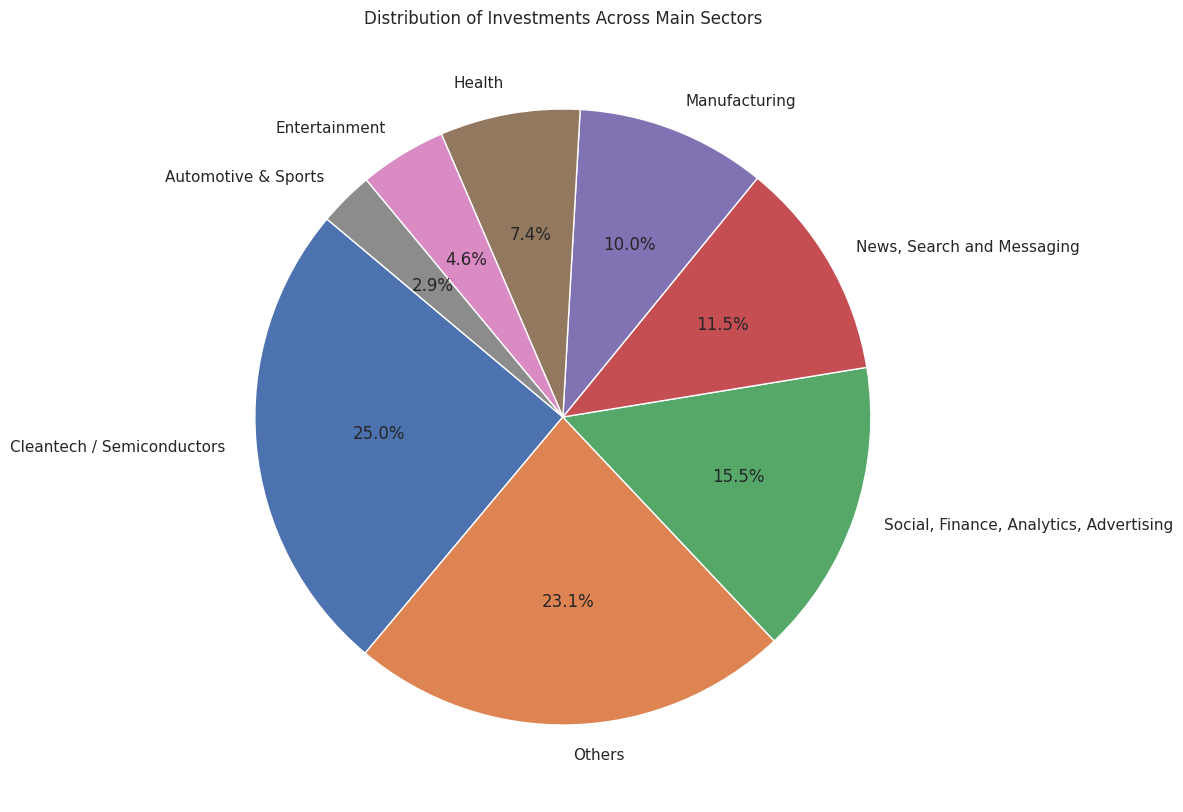

In [ ]:
# Plot the investment by sector
plt.figure(figsize=(10, 10))
plt.pie(investment_by_sector['raised_amount_usd'], labels=investment_by_sector['main_sector'], autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Investments Across Main Sectors')
plt.show()



*   ***Cleantech / Semiconductors*** This sector is most prefered for investments as it dominates our data with 25%
*   ***Others*** sector which is not spcified properly is still invested highly by almost 23% of times but could not be precisely lead to suggestion.

*  thus we recomend Sparks Fund to invest majorly in Cleantech / Semiconductors, if at all other investments have to be made than [Social, Finance, Analytics, Advertising] and [News, Search and Messaging] together could be used for other 25% of investments

* and lastly remaining quarter of investments can be done in secotrs like [Manufacturing, Health, Entertainment, Atumotive & Sports]

